In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
df1 = pd.read_csv("Multivriate_Data.csv")

In [2]:
df1

,Time,Speed,Rotation,Position,Translation,Label
0,0.020005,0.000030,1.570796,-199.999999,-300.0,0
1,0.040010,0.120060,1.570796,-199.997598,-300.0,0
2,0.060015,0.240090,1.570796,-199.992795,-300.0,0
3,0.080020,0.360120,1.570796,-199.985590,-300.0,0
4,0.100025,0.480150,1.570796,-199.975985,-300.0,0
...,...,...,...,...,...,...
287923,79.919980,9.918843,1.570796,145.766292,-100.0,0
287924,79.939985,9.920500,1.570796,145.964752,-100.0,0
287925,79.959990,9.922124,1.570796,146.163244,-100.0,0
287926,79.979995,9.923714,1.570796,146.361768,-100.0,0


# ***Preparing the data***

In [3]:
import numpy as np

y = df1['Label']
df1 = df1.drop("Label", axis=1)
#normalized_df=(df1-df1.mean())/df1.std()
X = np.asarray(df1)
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
X, y = shuffle(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# ***Making the models***

# ***Bidirectional GRU with Multi-head attention***

In [4]:
!pip install keras_multi_head

In [5]:
from keras.models import Sequential
from keras.layers import Dense,Dropout, GRU, Bidirectional, Input, GlobalMaxPool2D, SimpleRNN, BatchNormalization

from keras_multi_head import MultiHead

def get_bigrumh(input_length, opt):
  model = Sequential()
  model.add(Input(shape=(input_length, 1)))
  model.add(MultiHead(Bidirectional(GRU(units=64, return_sequences=True, activation='relu'))))
  model.add(BatchNormalization())
  model.add(Dense(units=5, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=3, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=4, activation='relu'))
  model.add(BatchNormalization())
  model.add(GlobalMaxPool2D())
  model.add(Dense(4, activation='softmax'))
  model.compile(metrics='acc',optimizer=opt,loss='categorical_crossentropy')
  return model

In [6]:
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
y1=to_categorical(y_train)
y_val1=to_categorical(y_val)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from time import time
from sklearn import metrics
# importing the module
import tracemalloc
from sklearn.metrics import classification_report
start = time()
lr=0.001
opt=tf.keras.optimizers.Adam(lr)
model1 = get_bigrumh(5,opt)
# starting the monitoring
tracemalloc.start()
history = model1.fit(X_train,y1,epochs = 10, batch_size=4096,validation_data=(X_val, y_val1))
yp =model1.predict(X_test)


Epoch 1/10
48/48 [==============================] - 80s 2s/step - loss: 1.4187 - acc: 0.5211 - val_loss: 1.4242 - val_acc: 0.1916
Epoch 2/10
48/48 [==============================] - 77s 2s/step - loss: 1.2928 - acc: 0.5211 - val_loss: 1.4540 - val_acc: 0.1916
Epoch 3/10
48/48 [==============================] - 76s 2s/step - loss: 1.2413 - acc: 0.5211 - val_loss: 1.5026 - val_acc: 0.1369
Epoch 4/10
48/48 [==============================] - 76s 2s/step - loss: 1.2210 - acc: 0.5211 - val_loss: 1.5459 - val_acc: 0.1369
Epoch 5/10
48/48 [==============================] - 78s 2s/step - loss: 1.2148 - acc: 0.5211 - val_loss: 1.5983 - val_acc: 0.1369
Epoch 6/10
48/48 [==============================] - 77s 2s/step - loss: 1.2131 - acc: 0.5211 - val_loss: 1.6560 - val_acc: 0.1369
Epoch 7/10
 5/48 [==>...........................] - ETA: 1:05 - loss: 1.2123 - acc: 0.5209

KeyboardInterrupt: 

In [7]:
print(time()-start)
ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.plot(history.history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()


# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.plot(history.history['val_acc'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
  
  
print("the model is bigru plus multihead attention")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=[0,1,2,3])
disp.plot()

plt.show()  
print("the accuracy for test is is", accuracy_score(y_test,ypred))
target_names = ['class 0', 'class 1', 'class 2','class 3']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()

485.47124886512756


NameError: name 'yp' is not defined

# ***Simple RNN***


In [8]:
from tensorflow.keras.layers import GlobalMaxPool1D
def get_rnn(input_length, opt):
  model = Sequential()
  model.add(Input(shape=(input_length, 1)))
  model.add(SimpleRNN(units=64, return_sequences=True, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=5, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=3, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=4, activation='relu'))
  model.add(BatchNormalization())
  model.add(GlobalMaxPool1D())
  model.add(Dense(4, activation='softmax'))
  model.compile(metrics='acc',optimizer=opt,loss='categorical_crossentropy')
  return model



In [9]:
from tensorflow.keras.utils import to_categorical
y1=to_categorical(y_train)
y_val1=to_categorical(y_val)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from time import time
from sklearn import metrics
# importing the module
import tracemalloc

start = time()
lr=0.001
opt=tf.keras.optimizers.Adam(lr)
model1 = get_rnn(5,opt)
model1.summary()
# starting the monitoring
tracemalloc.start()
history = model1.fit(X_train,y1,epochs = 50, batch_size=1024,validation_data=(X_val,y_val1))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5, 64)             4224      
                                                                 
 batch_normalization_4 (Batc  (None, 5, 64)            256       
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 5, 5)              325       
                                                                 
 batch_normalization_5 (Batc  (None, 5, 5)             20        
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 5, 3)              18        
                                                                 
 batch_normalization_6 (Batc  (None, 5, 3)            

Epoch 47/50
189/189 [==============================] - 3s 15ms/step - loss: 0.7751 - acc: 0.6500 - val_loss: 0.7936 - val_acc: 0.6458
Epoch 48/50
189/189 [==============================] - 3s 16ms/step - loss: 0.7777 - acc: 0.6500 - val_loss: 0.8502 - val_acc: 0.6217
Epoch 49/50
189/189 [==============================] - 3s 17ms/step - loss: 0.7795 - acc: 0.6497 - val_loss: 0.8619 - val_acc: 0.6175
Epoch 50/50
189/189 [==============================] - 3s 16ms/step - loss: 0.7758 - acc: 0.6506 - val_loss: 0.7675 - val_acc: 0.6560


228.2478687763214


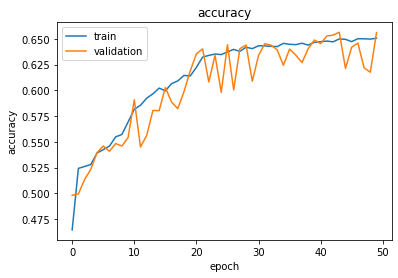

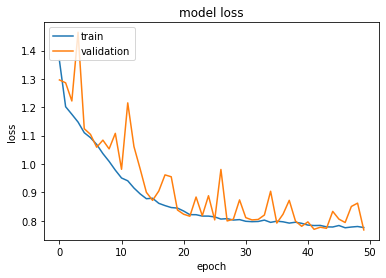

the model is rnn
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x000001D8FDC5A7F0>
the confusion matrix is [[21791  1106  2190     0]
 [ 2156  4511  1580   728]
 [ 2136   234  4183     0]
 [ 1249  3341  1474   830]]


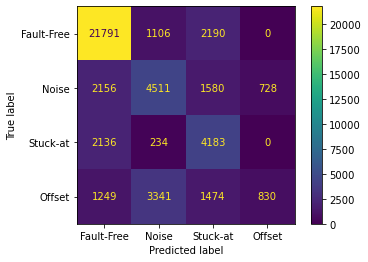

the accuracy for test is is 0.6591382685385927
              precision    recall  f1-score   support

  Fault-Free       0.80      0.87      0.83     25087
       Noise       0.49      0.50      0.50      8975
    Stuck-at       0.44      0.64      0.52      6553
      Offset       0.53      0.12      0.20      6894

    accuracy                           0.66     47509
   macro avg       0.57      0.53      0.51     47509
weighted avg       0.65      0.66      0.63     47509

(34750487, 36273000)


In [10]:
yp =model1.predict(X_test)
print(time()-start)
ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.plot(history.history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
  
  
print("the model is rnn")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=['Fault-Free','Noise','Stuck-at','Offset'])
disp.plot()

plt.show()  
print("the accuracy for test is is", accuracy_score(y_test,ypred))
target_names = ['Fault-Free','Noise','Stuck-at','Offset']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()

# ***Autoencoder based classifier***

In [11]:
import os
import keras
import numpy as np
import pandas as pd
import keras.backend as K
from sklearn.cluster import SpectralClustering
from time import time
from keras import callbacks
from keras.models import Model
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Input, Dropout
from keras.initializers import VarianceScaling
#from scipy.misc import imread
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, normalized_mutual_info_score
import tensorflow as tf

In [12]:
# Building the Input Layer
input_layer = Input(shape =(5, ))
  
# Building the Encoder network
encoded = Dense(4, activation ='relu')(input_layer)
encoded = BatchNormalization()(encoded)
encoded = Dense(4, activation ='relu')(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dense(8, activation ='relu')(encoded)
encoded = BatchNormalization()(encoded)
encoded = Dense(4, activation ='relu')(encoded)

  
# Building the Decoder network

decoded = Dense(4, activation ='relu')(encoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(8, activation ='relu')(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(4, activation ='relu')(decoded)
decoded = BatchNormalization()(decoded)
decoded = Dense(4, activation ='relu')(decoded)
  
# Building the Output Layer
output_layer = Dense(4, activation ='softmax')(decoded)

In [13]:
# Defining the parameters of the Auto-encoder network
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer ="adam", loss ="categorical_crossentropy",metrics='acc')
  
# Training the Auto-encoder network


In [14]:

lr=0.001
opt=tf.keras.optimizers.Adam(lr)
from tensorflow.keras.utils import to_categorical
y1=to_categorical(y_train)
# starting the monitoring
tracemalloc.start()
history = autoencoder.fit(X_train,y1,epochs=50, batch_size=512,validation_data=(X_val,y_val1))


Epoch 1/50
377/377 [==============================] - 4s 4ms/step - loss: 1.2429 - acc: 0.4754 - val_loss: 1.1919 - val_acc: 0.5242
Epoch 2/50
377/377 [==============================] - 1s 3ms/step - loss: 1.1371 - acc: 0.5292 - val_loss: 1.1161 - val_acc: 0.5366
Epoch 3/50
377/377 [==============================] - 1s 3ms/step - loss: 1.1033 - acc: 0.5347 - val_loss: 1.0771 - val_acc: 0.5432
Epoch 4/50
377/377 [==============================] - 1s 3ms/step - loss: 1.0793 - acc: 0.5370 - val_loss: 1.0564 - val_acc: 0.5527
Epoch 5/50
377/377 [==============================] - 1s 3ms/step - loss: 1.0636 - acc: 0.5445 - val_loss: 1.0439 - val_acc: 0.5642
Epoch 6/50
377/377 [==============================] - 1s 3ms/step - loss: 1.0543 - acc: 0.5484 - val_loss: 1.0311 - val_acc: 0.5586
Epoch 7/50
377/377 [==============================] - 1s 3ms/step - loss: 1.0443 - acc: 0.5544 - val_loss: 1.0205 - val_acc: 0.5747
Epoch 8/50
377/377 [==============================] - 1s 3ms/step - loss: 1.

439.5767753124237


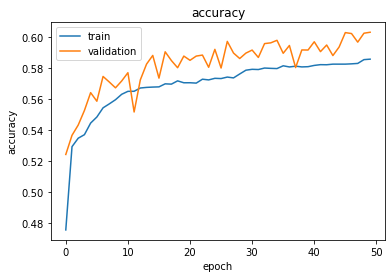

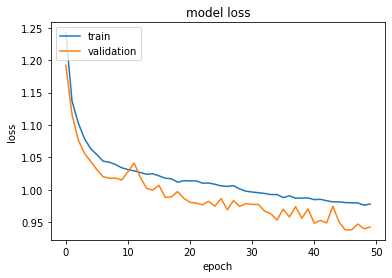

the model is autoencoders
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x000001D88CDC2040>
the confusion matrix is [[23127   547  1354    59]
 [ 4984  2590  1112   289]
 [ 3927     0  2626     0]
 [ 3639  2100   665   490]]


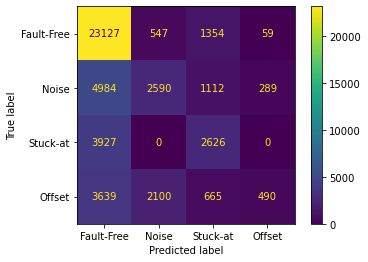

the accuracy for test is is 0.6068955355827317
              precision    recall  f1-score   support

  Fault-Free       0.65      0.92      0.76     25087
       Noise       0.49      0.29      0.36      8975
    Stuck-at       0.46      0.40      0.43      6553
      Offset       0.58      0.07      0.13      6894

    accuracy                           0.61     47509
   macro avg       0.55      0.42      0.42     47509
weighted avg       0.58      0.61      0.55     47509

(12616546, 14158880)


In [15]:
yp =autoencoder.predict(X_test)
print(time()-start)
ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.plot(history.history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
  
  
print("the model is autoencoders")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=['Fault-Free','Noise','Stuck-at','Offset'])
disp.plot()

plt.show()  
print("the accuracy for test is is", accuracy_score(y_test,ypred))
target_names = ['Fault-Free','Noise','Stuck-at','Offset']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()

# ***Transformers based classifier***

In [16]:
from keras import layers
import keras
import tensorflow as tf
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads,
                                             key_dim=embed_dim)
        self.ffn = keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)  # self-attention layer
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)  # layer norm
        ffn_output = self.ffn(out1)  #feed-forward layer
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)  # layer norm

In [17]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size,
                                          output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [18]:
def transatt(input_length, opt):
  embed_dim = 40 # Embedding size for each token
  num_heads = 5  # Number of attention heads
  ff_dim = 6  # Hidden layer size in feed forward network inside transformer

  model = keras.Sequential()
  model.add(layers.Dense(5, activation='relu'))
  model.add(layers.Input(shape=(input_length, )))
  model.add(TokenAndPositionEmbedding(input_length, 1000000, embed_dim))
  model.add(TransformerBlock(embed_dim, num_heads, ff_dim))
  model.add(layers.GlobalAveragePooling1D())
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(ff_dim, activation='relu'))
  model.add(layers.Dropout(0.1))
  model.add(layers.Dense(4, activation='softmax'))
  model.compile(metrics='acc',optimizer=opt,loss='categorical_crossentropy')
  return model

In [19]:
lr=0.001
from tensorflow.keras.utils import to_categorical
y1=to_categorical(y_train)
y_val1=to_categorical(y_val)
opt=tf.keras.optimizers.Adam(lr)
model1 = transatt(5,opt)
# starting the monitoring

history = model1.fit(X_train,y1,epochs = 50, batch_size=2048,validation_data=(X_val,y_val1))


Epoch 1/50
95/95 [==============================] - 72s 746ms/step - loss: 1.2190 - acc: 0.5148 - val_loss: 1.1679 - val_acc: 0.5246
Epoch 2/50
95/95 [==============================] - 66s 695ms/step - loss: 1.1803 - acc: 0.5243 - val_loss: 1.1536 - val_acc: 0.5323
Epoch 3/50
95/95 [==============================] - 66s 691ms/step - loss: 1.1655 - acc: 0.5274 - val_loss: 1.1401 - val_acc: 0.5338
Epoch 4/50
95/95 [==============================] - 65s 688ms/step - loss: 1.1551 - acc: 0.5285 - val_loss: 1.1318 - val_acc: 0.5335
Epoch 5/50
95/95 [==============================] - 66s 692ms/step - loss: 1.1466 - acc: 0.5293 - val_loss: 1.1226 - val_acc: 0.5342
Epoch 6/50
95/95 [==============================] - 66s 695ms/step - loss: 1.1340 - acc: 0.5328 - val_loss: 1.1095 - val_acc: 0.5402
Epoch 7/50
95/95 [==============================] - 65s 681ms/step - loss: 1.1261 - acc: 0.5350 - val_loss: 1.1019 - val_acc: 0.5408
Epoch 8/50
95/95 [==============================] - 66s 690ms/step - 

4094.6312363147736


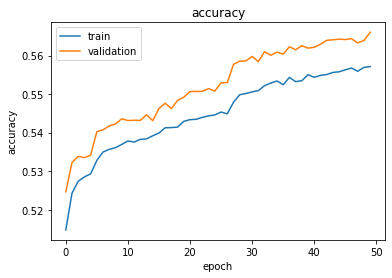

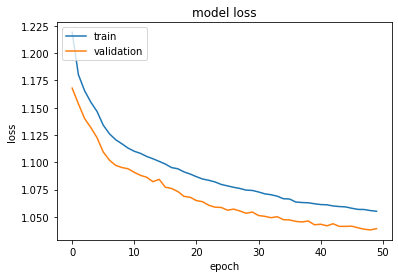

the model is transformers
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x000001D88FA94760>
the confusion matrix is [[23976   667   425    19]
 [ 7155  1339   321   160]
 [ 4473   560  1518     2]
 [ 5470  1000   128   296]]


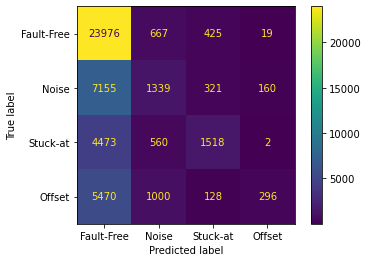

the accuracy for test is is 0.5710286472036877
              precision    recall  f1-score   support

  Fault-Free       0.58      0.96      0.72     25087
       Noise       0.38      0.15      0.21      8975
    Stuck-at       0.63      0.23      0.34      6553
      Offset       0.62      0.04      0.08      6894

    accuracy                           0.57     47509
   macro avg       0.55      0.34      0.34     47509
weighted avg       0.56      0.57      0.48     47509

(0, 0)


In [20]:
yp =model1.predict(X_test)
print(time()-start)
ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.plot(history.history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
  
  
print("the model is transformers")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=['Fault-Free','Noise','Stuck-at','Offset'])
disp.plot()

plt.show()  
print("the accuracy for test is is", accuracy_score(y_test,ypred))
target_names = ['Fault-Free','Noise','Stuck-at','Offset']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()

# ***GRU+Simple RNN***

In [21]:
from tensorflow.keras.layers import GlobalMaxPool1D
def get_grurnn(input_length, opt):
  model = Sequential()
  model.add(Input(shape=(input_length, 1)))
  model.add(GRU(units=64, return_sequences=True, activation='relu'))
  model.add(SimpleRNN(units=64, return_sequences=True, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=5, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=3, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=4, activation='relu'))
  model.add(BatchNormalization())
  model.add(GlobalMaxPool1D())
  model.add(Dense(4, activation='softmax'))
  model.compile(metrics='acc',optimizer=opt,loss='categorical_crossentropy')
  return model


In [22]:
lr=0.001
opt=tf.keras.optimizers.Adam(lr)

# starting the monitoring
tracemalloc.start()
model = get_grurnn(5,opt)
history = model.fit(X_train,y1,epochs = 50, batch_size=2048,validation_data=(X_val,y_val1))


Epoch 1/50
95/95 [==============================] - 13s 88ms/step - loss: 1.4849 - acc: 0.3221 - val_loss: 1.4504 - val_acc: 0.3477
Epoch 2/50
95/95 [==============================] - 10s 101ms/step - loss: 1.2069 - acc: 0.5137 - val_loss: 1.3039 - val_acc: 0.4493
Epoch 3/50
95/95 [==============================] - 9s 91ms/step - loss: 1.1147 - acc: 0.5395 - val_loss: 1.2221 - val_acc: 0.5076
Epoch 4/50
95/95 [==============================] - 8s 81ms/step - loss: 1.0377 - acc: 0.5656 - val_loss: 1.1689 - val_acc: 0.5514
Epoch 5/50
95/95 [==============================] - 7s 74ms/step - loss: 0.9590 - acc: 0.5942 - val_loss: 1.0516 - val_acc: 0.5922
Epoch 6/50
95/95 [==============================] - 7s 78ms/step - loss: 0.8752 - acc: 0.6282 - val_loss: 1.0560 - val_acc: 0.5513
Epoch 7/50
95/95 [==============================] - 8s 79ms/step - loss: 0.8432 - acc: 0.6369 - val_loss: 0.8614 - val_acc: 0.6109
Epoch 8/50
95/95 [==============================] - 7s 78ms/step - loss: 0.8129 

4497.881531953812


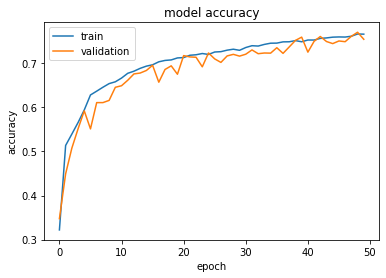

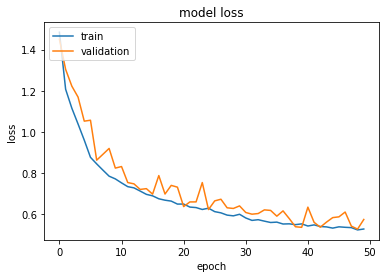

the model is gru+simplernn
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x000001D88E848160>
the confusion matrix is [[23770   419   466   432]
 [ 1381  5758   249  1587]
 [ 2381   150  4019     3]
 [ 1117  2965   235  2577]]


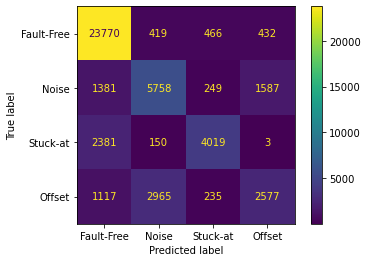

the accuracy is 0.7603611947210003
              precision    recall  f1-score   support

  Fault-Free       0.83      0.95      0.88     25087
       Noise       0.62      0.64      0.63      8975
    Stuck-at       0.81      0.61      0.70      6553
      Offset       0.56      0.37      0.45      6894

    accuracy                           0.76     47509
   macro avg       0.70      0.64      0.67     47509
weighted avg       0.75      0.76      0.75     47509

(16421170, 17960491)


In [23]:
yp =model.predict(X_test)
print(time()-start)
ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
  
  
print("the model is gru+simplernn")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=['Fault-Free','Noise','Stuck-at','Offset'])
disp.plot()

plt.show()  
print("the accuracy is", accuracy_score(y_test,ypred))
target_names = ['Fault-Free','Noise','Stuck-at','Offset']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()

# ***Bidirectional GRU +Bidirectional SimpleRNN***

In [24]:
from tensorflow.keras.layers import GlobalMaxPool1D
def get_bigrurnn(input_length, opt):
  model = Sequential()
  model.add(Input(shape=(input_length, 1)))
  model.add(Bidirectional(GRU(units=64, return_sequences=True, activation='relu')))
  model.add(Bidirectional(SimpleRNN(units=64, return_sequences=True, activation='relu')))
  model.add(BatchNormalization())
  model.add(Dense(units=5, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=3, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(units=4, activation='relu'))
  model.add(BatchNormalization())
  model.add(GlobalMaxPool1D())
  model.add(Dense(4, activation='softmax'))
  model.compile(metrics='acc',optimizer=opt,loss='categorical_crossentropy')
  return model

In [25]:
lr=0.001
opt=tf.keras.optimizers.Adam(lr)

# starting the monitoring
tracemalloc.start()
model = get_bigrurnn(5,opt)
history = model.fit(X_train,y1,epochs = 50, batch_size=2048,validation_data=(X_val,y_val1))


Epoch 1/50
95/95 [==============================] - 30s 223ms/step - loss: 1.2046 - acc: 0.5320 - val_loss: 1.2389 - val_acc: 0.4604
Epoch 2/50
95/95 [==============================] - 18s 189ms/step - loss: 1.0380 - acc: 0.5647 - val_loss: 1.1887 - val_acc: 0.4828
Epoch 3/50
95/95 [==============================] - 18s 191ms/step - loss: 0.9441 - acc: 0.6052 - val_loss: 1.1118 - val_acc: 0.5232
Epoch 4/50
95/95 [==============================] - 18s 188ms/step - loss: 0.8654 - acc: 0.6383 - val_loss: 0.9691 - val_acc: 0.5981
Epoch 5/50
95/95 [==============================] - 17s 183ms/step - loss: 0.8135 - acc: 0.6619 - val_loss: 0.8817 - val_acc: 0.6366
Epoch 6/50
95/95 [==============================] - 17s 183ms/step - loss: 0.7464 - acc: 0.6919 - val_loss: 0.9314 - val_acc: 0.6377
Epoch 7/50
95/95 [==============================] - 18s 195ms/step - loss: 0.6996 - acc: 0.7089 - val_loss: 0.8425 - val_acc: 0.6670
Epoch 8/50
95/95 [==============================] - 17s 178ms/step - 

5430.016236305237


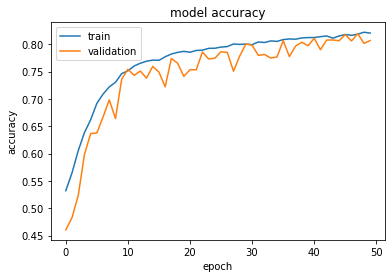

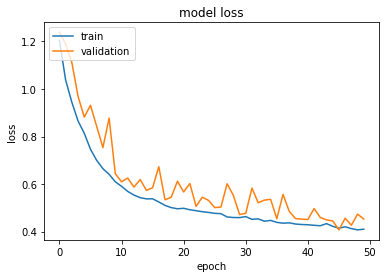

the model is bigru+birnn
the optimizer is <keras.optimizer_v2.adam.Adam object at 0x000001D88D11F670>
the confusion matrix is [[22630   583  1593   281]
 [  952  6743   299   981]
 [ 1270    68  5213     2]
 [  703  2343   196  3652]]


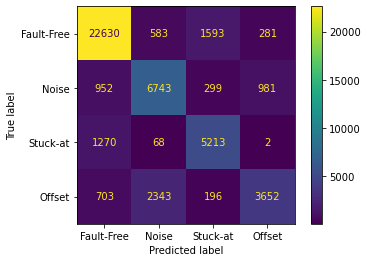

the accuracy is 0.8048580269001663
              precision    recall  f1-score   support

  Fault-Free       0.89      0.90      0.89     25087
       Noise       0.69      0.75      0.72      8975
    Stuck-at       0.71      0.80      0.75      6553
      Offset       0.74      0.53      0.62      6894

    accuracy                           0.80     47509
   macro avg       0.76      0.74      0.75     47509
weighted avg       0.80      0.80      0.80     47509

(21565628, 23106816)


In [26]:
yp =model.predict(X_test)
print(time()-start)
ypred = np.argmax(yp, axis=1)
actual=y_test
predicted=ypred
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.plot(history.history['val_acc'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.title('model loss')
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
  
  
print("the model is bigru+birnn")
print("the optimizer is", opt)
matrix = confusion_matrix(actual,predicted, labels=[0,1,2,3])
print("the confusion matrix is", matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix,
                               display_labels=['Fault-Free','Noise','Stuck-at','Offset'])
disp.plot()

plt.show()  
print("the accuracy is", accuracy_score(y_test,ypred))
target_names = ['Fault-Free','Noise','Stuck-at','Offset']
print(classification_report(actual, predicted, target_names=target_names))

# displaying the memory
print(tracemalloc.get_traced_memory())
# stopping the library
tracemalloc.stop()